<a href="https://colab.research.google.com/github/garkul/Transcriptomics.msu/blob/master/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Домашнее задание 5</h1>
<h3> Гаркуль Лидия 4 курс ФББ</h3>

<b>Задание:</b><br>
Скачайте каунты экспрессий для тех же образцов (Google Drive ID: 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg) и выполните дифференциальную экспрессию при помощи DESeq2 между кластерами, которые мы определили в начале семинара. Возьмите результат DESeq2, упорядочьте по
<br>
    1. logFC,<br>
    2. —logFDR со знаком logFC,

и попробуйте на этом списке запустить gsea.prerank с сигнатурами, которые сегодня уже использовались. Сходится ли результат с тем, что получается при классическом запуске GSEA?

###Скачиваем все необходимые пакеты и данные, с которыми будем работать.


In [ ]:
!gdown "1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg&confirm=t
To: /content/LUAD_counts.tsv
100% 3.18M/3.18M [00:00<00:00, 124MB/s]


In [ ]:
!apt-get install libgmp3-dev libcairo2-dev libharfbuzz-dev libfribidi-dev libudunits2-dev
!gdown "1W0TuuQospxcasOX5cQdhT_Xd-k7-QAck&confirm=t"
!tar xf library.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libharfbuzz-dev is already the newest version (1.7.2-1ubuntu1).
libharfbuzz-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libgmp-dev libgmpxx4ldbl libpixman-1-dev
  libudunits2-0 libudunits2-data libxcb-shm0-dev
Suggested packages:
  libcairo2-doc gmp-doc libgmp10-doc libmpfr-dev
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libfribidi-dev libgmp-dev
  libgmp3-dev libgmpxx4ldbl libpixman-1-dev libudunits2-0 libudunits2-data
  libudunits2-dev libxcb-shm0-dev
0 upgraded, 11 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,735 kB of archives.
After this operation, 6,864 kB of additional disk space will be used.
Get:1 http://archive.ubu

In [ ]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython
%R .libPaths("usr/local/lib/R/site-library/")

!Rscript -e 'install.packages("dplyr")'
!Rscript -e 'install.packages("ggplot2")'
!Rscript -e 'install.packages("tidyr")'
!Rscript -e 'install.packages("stringr")'
!Rscript -e 'install.packages("statmod")'
!Rscript -e 'install.packages("MASS")'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 9.3 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310200 sha256=ae9547137a1a6414a503cf6b7ea947d09ca6e5c8a38390c05e9177ecc3f7487a
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.10.tar.gz'
Content type 'application/x-gzip' length 884984 bytes (864 KB)
downloaded 864 KB

* installing *source* package ‘dplyr’ ...
** package ‘dplyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
g++ -std=gnu++14 -I"/usr/share/R/incl

In [ ]:
%%R

suppressPackageStartupMessages({
  library(edgeR)
  library(stringr)
  library(dplyr)
  library(tidyr)
  library(tximport)
  library(EnsDb.Mmusculus.v79)
  library(ggplot2)
  library(MASS)
})

In [ ]:
!pip3 install gseapy==0.10.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 8.0 MB/s 
     |████████████████████████████████| 197 kB 42.9 MB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 144 kB 69.0 MB/s 
     |████████████████████████████████| 6.5 MB 38.2 MB/s 
     |████████████████████████████████| 261 kB 12.3 MB/s 
     |████████████████████████████████| 127 kB 56.8 MB/s 
  Created wheel for bioservices: filename=bioservices-1.10.4-py3-none-any.whl size=230587 sha256=64e64ae48bc6088ed54a7125b0867e20c0e18009ed2810c6fd339b88ce437484
  Stored in directory: /root/.cache/pip/wheels/c6/0e/cd/c43122ec1b7a34d6ae165695f4520ae18d58cac45b75e197a8
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=ddaf165e3827fade89d542a9c0c49d976aacd79affd870ee8a2bbbb66b8ddf31
  Stored in director

In [ ]:
!wget https://raw.githubusercontent.com/BostonGene/MFP/master/signatures/gene_signatures.gmt

--2022-12-08 20:44:42--  https://raw.githubusercontent.com/BostonGene/MFP/master/signatures/gene_signatures.gmt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2607 (2.5K) [text/plain]
Saving to: ‘gene_signatures.gmt’

gene_signatures.gmt 100%[===================>]   2.55K  --.-KB/s    in 0s      

2022-12-08 20:44:42 (39.1 MB/s) - ‘gene_signatures.gmt’ saved [2607/2607]



###Дифференциальная экспрессия при помощи DESeq2

In [ ]:
%%R
countData <- read.csv('LUAD_counts.tsv', header=TRUE, sep='\t')
countData <- countData %>% distinct(gene_name, .keep_all = TRUE)

In [ ]:
%%R -o metaData
sample_number <- c(0:39)
cluster <- c('low_immune',
 'immune',
 'immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'immune',
 'low_immune',
 'low_immune',
 'low_immune',
 'immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'immune',
 'immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'low_immune',
 'immune',
 'low_immune',
 'immune') 
metaData <- data.frame(sample_number, cluster)
head(metaData)

  sample_number    cluster
1             0 low_immune
2             1     immune
3             2     immune
4             3     immune
5             4     immune
6             5     immune


In [ ]:
%%R
library(DESeq2)
dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~cluster, tidy=TRUE)




Attaching package: 'matrixStats'



    anyMissing, rowMedians



    count


Attaching package: 'MatrixGenerics'



    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeig

In [ ]:
%%R
dds

class: DESeqDataSet 
dim: 19938 40 
metadata(1): version
assays(1): counts
rownames(19938): TSPAN6 TNMD ... AL391628.1 AP006621.6
rowData names(0):
colnames(40): sample_0 sample_1 ... sample_38 sample_39
colData names(2): sample_number cluster


In [ ]:
%%R
dds <- DESeq(dds)







-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)





In [ ]:
%%R
res <- results(dds)
head(results(dds, tidy=TRUE))

       row    baseMean log2FoldChange     lfcSE       stat       pvalue
1   TSPAN6 2806.894459      0.3471317 0.2176816  1.5946765 0.1107846057
2     TNMD    1.271631      0.3858644 0.8660943  0.4455224 0.6559422692
3     DPM1 1535.877965     -0.1422586 0.1354254 -1.0504567 0.2935081713
4    SCYL3  685.428661      0.1539538 0.1248387  1.2332216 0.2174930905
5 C1orf112  333.470770     -0.2583610 0.2368413 -1.0908614 0.2753338880
6      FGR 1192.161753     -1.2174624 0.3011813 -4.0422905 0.0000529316
          padj
1 0.2526721709
2 0.7952082352
3 0.4861673777
4 0.3996543851
5 0.4671358194
6 0.0009520589


In [ ]:
%%R
summary(res)


out of 19192 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2604, 14%
LFC < 0 (down)     : 2921, 15%
outliers [1]       : 0, 0%
low counts [2]     : 755, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R
write.csv(as.data.frame(res), 
          file="results_DESeq.csv")

### GSEA Prerank по logFC

In [ ]:
signatures = {}

with open("gene_signatures.gmt") as f:
  for line in f.readlines():
    signatures[line.split("\t")[0]] = line.strip().split("\t")[2:]

signatures

{'MHCI': ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'TAP2', 'NLRC5', 'TAPBP'],
 'MHCII': ['HLA-DRA',
  'HLA-DRB1',
  'HLA-DMA',
  'HLA-DPA1',
  'HLA-DPB1',
  'HLA-DMB',
  'HLA-DQB1',
  'HLA-DQA1',
  'CIITA'],
 'Coactivation_molecules': ['CD28',
  'CD40',
  'TNFRSF4',
  'ICOS',
  'TNFRSF9',
  'CD27',
  'CD80',
  'CD86',
  'CD40LG',
  'CD83',
  'TNFSF4',
  'ICOSLG',
  'TNFSF9',
  'CD70'],
 'Effector_cells': ['IFNG',
  'GZMA',
  'GZMB',
  'PRF1',
  'GZMK',
  'ZAP70',
  'GNLY',
  'FASLG',
  'TBX21',
  'EOMES',
  'CD8A',
  'CD8B'],
 'T_cell_traffic': ['CXCL9',
  'CXCL10',
  'CXCL11',
  'CX3CL1',
  'CCL3',
  'CCL4',
  'CX3CR1',
  'CCL5',
  'CXCR3'],
 'NK_cells': ['NKG7',
  'CD160',
  'CD244',
  'NCR1',
  'KLRC2',
  'KLRK1',
  'CD226',
  'GZMH',
  'GNLY',
  'IFNG',
  'KIR2DL4',
  'EOMES',
  'GZMB',
  'FGFBP2',
  'KLRF1',
  'SH2D1B',
  'NCR3'],
 'T_cells': ['TBX21',
  'ITK',
  'CD3D',
  'CD3E',
  'CD3G',
  'TRAC',
  'TRBC1',
  'TRBC2',
  'CD28',
  'CD5',
  'TRAT1'],
 'B_cells': ['CD19',
  'MS4

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('results_DESeq.csv')
df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TSPAN6,2806.894459,0.347132,0.217682,1.594676,0.110785,0.252672
1,TNMD,1.271631,0.385864,0.866094,0.445522,0.655942,0.795208
2,DPM1,1535.877965,-0.142259,0.135425,-1.050457,0.293508,0.486167
3,SCYL3,685.428661,0.153954,0.124839,1.233222,0.217493,0.399654
4,C1orf112,333.470770,-0.258361,0.236841,-1.090861,0.275334,0.467136
...,...,...,...,...,...,...,...
19933,AL451106.1,0.000000,NaN,NaN,NaN,NaN,NaN
19934,AC008763.4,0.138066,-0.423472,2.971508,-0.142511,0.886677,NaN
19935,AC006486.3,0.000000,NaN,NaN,NaN,NaN,NaN
19936,AL391628.1,6.715430,0.509919,0.316498,1.611127,0.107152,0.246705


In [ ]:
#упорядочим по logFC
df = df.dropna()
df_logFC = df.sort_values('log2FoldChange')[["Unnamed: 0", "log2FoldChange"]]
df_logFC

,Unnamed: 0,log2FoldChange
2798,SALL1,-5.555977
5776,SSX1,-4.848202
11198,TBX20,-4.843387
14058,CALML5,-4.809325
14134,FOXE1,-4.717581
...,...,...
13586,PCSK1,5.600581
17747,MUC5AC,5.679430
234,PAX7,5.849351
9904,SST,6.414333


In [ ]:
import gseapy as gp

pre_logFC = gp.prerank(rnk=df_logFC, gene_sets=signatures.copy(), min_size=3,permutation_num=1000, outdir=None, verbose=True)

In [ ]:
pre_logFC.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
CAF,-0.750340,-1.933057,0.000000,0.000000,19,19,MFAP5;CD248;PDGFRB;ACTA2;COL5A1;MMP2;COL6A1;LU...,PDGFRB;ACTA2;COL5A1;MMP2;COL6A1;LUM;COL1A2;COL...
Coactivation_molecules,-0.845632,-2.036181,0.000000,0.000000,14,14,ICOSLG;TNFSF9;TNFRSF4;CD83;CD27;CD70;CD80;CD40...,CD83;CD27;CD70;CD80;CD40;TNFSF4;CD28;CD86;CD40...
Effector_cells,-0.890249,-2.085723,0.000000,0.000000,12,12,GNLY;ZAP70;GZMB;EOMES;TBX21;CD8B;GZMA;CD8A;PRF...,ZAP70;GZMB;EOMES;TBX21;CD8B;GZMA;CD8A;PRF1;GZM...
NK_cells,-0.842812,-2.149092,0.000000,0.000000,17,17,FGFBP2;GNLY;KLRF1;CD160;KLRK1;KLRC2;GZMB;EOMES...,KLRF1;CD160;KLRK1;KLRC2;GZMB;EOMES;NCR3;KIR2DL...
T_cell_traffic,-0.886657,-1.931742,0.000000,0.000000,9,9,CX3CL1;CXCR3;CX3CR1;CCL3;CCL4;CCL5;CXCL10;CXCL...,CXCR3;CX3CR1;CCL3;CCL4;CCL5;CXCL10;CXCL11;CXCL9
T_cells,-0.945231,-1.984563,0.000000,0.000000,11,8,CD28;CD3D;CD5;CD3E;ITK;TBX21;CD3G;TRAT1,CD28;CD3D;CD5;CD3E;ITK;TBX21;CD3G;TRAT1
Macrophage_DC_traffic,-0.892433,-1.867346,0.000000,0.000481,8,8,XCL1;CSF1;CSF1R;XCR1;CCL2;CCR2;CCL7;CCL8,CSF1;CSF1R;XCR1;CCL2;CCR2;CCL7;CCL8
B_cells,-0.782808,-1.838794,0.000000,0.001052,13,13,CR2;BLK;TNFRSF13B;PAX5;STAP1;CD79B;TNFRSF13C;C...,STAP1;CD79B;TNFRSF13C;CD79A;MS4A1;CD22;FCRL5;C...
Macrophages,-0.893281,-1.830264,0.000000,0.001496,8,8,CD68;SIGLEC1;IL10;CSF1R;MRC1;CD163;MSR1;IL4I1,CD68;SIGLEC1;IL10;CSF1R;MRC1;CD163;MSR1;IL4I1


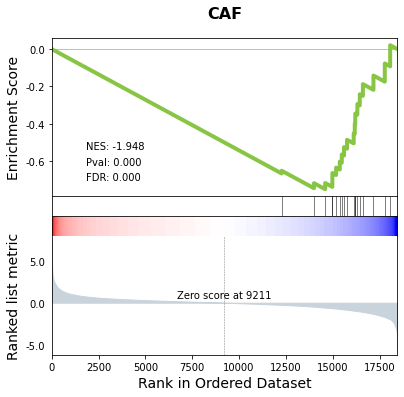

In [ ]:
from gseapy import gseaplot, heatmap

group = "CAF"
gseaplot(pre_logFC.ranking, term=group, **pre_logFC.results[group])

Сравнение с результатами с семинара. <br>
Рассмотрим какие сигнатуры попали в fdr < 0.05 на семинаре, а какие сейчас.<br>
*На семинаре GSEA:* <br>**Coactivation_molecules**, **Checkpoint_inhibition**, **Macrophage_DC_traffic**, **T_cell_traffic**, **Macrophages**, **M1_signatures**, **Antitumor_cytokines**, **Effector_cells**, **NK_cells**, **MDSC**, **Treg**, **MDSC_traffic**.
<br>
*GSEA prerank:* <br>
CAF, **Coactivation_molecules**, **Effector_cells**, **NK_cells**, **T_cell_traffic**, T_cells, **Macrophage_DC_traffic**, B_cells, **Macrophages**, MHCII, **Checkpoint_inhibition**, EMT_signature, Angiogenesis, **MDSC_traffic**, Th1_signature, **Antitumor_cytokines**, **M1_signatures**, Endothelium, Matrix_remodeling, **MDSC**, **Treg**, MHCI.

<br>
Жирным выделено, если сигнатура попала и в gsea и в gsea prerank (по logFC). <br>
Видно, что все сигнатуры, которые выдало значимым gsea попали в gsea prerank.  

### GSEA Prerank по —logFDR со знаком logFC

In [ ]:
def sign_logFC(row):  
    if row['log2FoldChange'] >= 0:
        return 1
    else:
        return -1


sign = lambda x: x and (1, -1)[x<0]
df_FDR = df
df_FDR['sign'] = df_FDR.apply(lambda row: sign_logFC(row), axis=1)
df_FDR["sorting"] = df["padj"] * -1 * df_FDR["sign"]
df_FDR = df_FDR.sort_values('sorting')[["Unnamed: 0", "log2FoldChange"]]
df_FDR

,Unnamed: 0,log2FoldChange
19655,AL117339.4,0.000099
10033,TPRG1L,0.000089
7528,RBP4,0.000463
5096,MND1,0.000489
17522,DENND1B,0.000100
...,...,...
1964,CAPN3,-0.000542
18480,TARM1,-0.000660
3844,NAA25,-0.000157
5071,RNF170,-0.000054


In [ ]:
pre_FDR = gp.prerank(rnk=df_FDR, gene_sets=signatures.copy(), min_size=3,permutation_num=1000, outdir=None, verbose=True)

In [ ]:
pre_FDR.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
CAF,-0.750340,-1.942884,0.000000,0.000000,19,19,MFAP5;CD248;PDGFRB;ACTA2;COL5A1;MMP2;COL6A1;LU...,PDGFRB;ACTA2;COL5A1;MMP2;COL6A1;LUM;COL1A2;COL...
Coactivation_molecules,-0.845632,-2.002677,0.000000,0.000000,14,14,ICOSLG;TNFSF9;TNFRSF4;CD83;CD27;CD70;CD80;CD40...,CD83;CD27;CD70;CD80;CD40;TNFSF4;CD28;CD86;CD40...
Effector_cells,-0.890249,-2.043743,0.000000,0.000000,12,12,GNLY;ZAP70;GZMB;EOMES;TBX21;CD8B;GZMA;CD8A;PRF...,ZAP70;GZMB;EOMES;TBX21;CD8B;GZMA;CD8A;PRF1;GZM...
NK_cells,-0.842812,-2.148919,0.000000,0.000000,17,17,FGFBP2;GNLY;KLRF1;CD160;KLRK1;KLRC2;GZMB;EOMES...,KLRF1;CD160;KLRK1;KLRC2;GZMB;EOMES;NCR3;KIR2DL...
T_cell_traffic,-0.886657,-1.952531,0.000000,0.000000,9,9,CX3CL1;CXCR3;CX3CR1;CCL3;CCL4;CCL5;CXCL10;CXCL...,CXCR3;CX3CR1;CCL3;CCL4;CCL5;CXCL10;CXCL11;CXCL9
T_cells,-0.945231,-1.949688,0.000000,0.000000,11,8,CD28;CD3D;CD5;CD3E;ITK;TBX21;CD3G;TRAT1,CD28;CD3D;CD5;CD3E;ITK;TBX21;CD3G;TRAT1
Macrophage_DC_traffic,-0.892433,-1.873631,0.000000,0.000714,8,8,XCL1;CSF1;CSF1R;XCR1;CCL2;CCR2;CCL7;CCL8,CSF1;CSF1R;XCR1;CCL2;CCR2;CCL7;CCL8
B_cells,-0.782808,-1.852958,0.000000,0.001041,13,13,CR2;BLK;TNFRSF13B;PAX5;STAP1;CD79B;TNFRSF13C;C...,STAP1;CD79B;TNFRSF13C;CD79A;MS4A1;CD22;FCRL5;C...
Macrophages,-0.893281,-1.850176,0.000000,0.001110,8,8,CD68;SIGLEC1;IL10;CSF1R;MRC1;CD163;MSR1;IL4I1,CD68;SIGLEC1;IL10;CSF1R;MRC1;CD163;MSR1;IL4I1


В сортировке по —logFDR со знаком logFC вышли такие же сигнатуры, как и в сортировке по logFC. Поэтому в данном случае результаты тоже согласуются с результатами семинара.